# Jupyter Snake

## General Imports

In [1]:
import os

from algorithms import *
from snake_environment import *
from states_bracket import *
from epsilon_scheduler import *
from utils import *

In [2]:
current_path = os.getcwd()
models_path = current_path + "/models/"

In [3]:
# Bracketer
bracketer = NeighPlusFoodDirectionBracket(neigh="V", radius=1)
# General Settings
gamma = 0.99
lr_v = 0.15
n_episodes = 25000
epsilon_schedule = LinearEpsilonDecay(eps=1, coefficient=0.999, minimum=0.15)

## QLearning

Episode 9600/25000 : epsilon 0.15 : Average performance -4.04


Learning finished


Episode 100 : Average performance -21.58
Episode 200 : Average performance -21.97
Episode 300 : Average performance -24.175
Episode 400 : Average performance -23.91
Episode 500 : Average performance -22.025
Episode 600 : Average performance -23.865
Episode 700 : Average performance -22.705
Episode 800 : Average performance -20.32
Episode 900 : Average performance -21.71
Episode 1000 : Average performance -19.43
Episode 1100 : Average performance -16.44
Episode 1200 : Average performance -15.885
Episode 1300 : Average performance -15.28
Episode 1400 : Average performance -14.935
Episode 1500 : Average performance -12.735
Episode 1600 : Average performance -10.725
Episode 1700 : Average performance -6.61
Episode 1800 : Average performance -8.88
Episode 1900 : Average performance -5.785
Episode 2000 : Average performance -5.29
Episode 2100 : Average performance -0.975
Episode 2200 : Average performance -7.

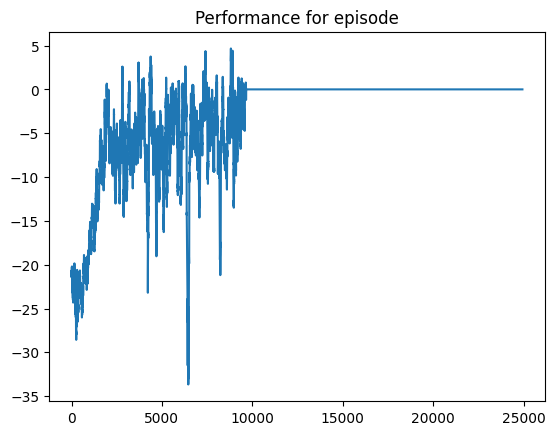

SystemExit: 0

C:\Users\enric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3675: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
# Environment
env = SnakeEnv(render_mode="nonhuman", max_step=1000)
Q_p = QLearning(env.action_space.n, gamma=gamma, lr_v=lr_v)
Q_p.learning(env, epsilon_schedule, n_episodes, bracketer)

In [ ]:
name_specs = f'linear from 1 to 015 with 0999 as coefficient vn1 plus fd 1000 max iterations'
model_path = f"{models_path}QLearning gamma {gamma} lr {lr_v} epsilon {name_specs} 2nd"

In [ ]:
Q_p.save(f"{model_path}")

In [ ]:
Q_p.upload(f"{model_path}")

In [ ]:
env = SnakeEnv(render_mode="human", max_step=1000)
Q_p.play(env, bracketer)

In [ ]:
Q_p.print_q_values(bracketer)

##  SARSA

In [ ]:
# Environment
epsilon_schedule = LinearEpsilonDecay(eps=1, coefficient=0.9999, minimum=0.30)
env = SnakeEnv(render_mode="nonhuman", max_step=1000)
SARSA_p = SARSA(env.action_space.n, gamma=gamma, lr_v=lr_v)
bracketer = FoodDirectionBracket()
SARSA_p.learning(env, epsilon_schedule, n_episodes=50000, bracketer=bracketer)

In [ ]:
name_specs = f'linear from 1 to 030 with 09999 as coefficient vn1 plus fd 1000 max iterations'
model_path = f"{models_path}SARSA gamma {gamma} lr {lr_v} epsilon {name_specs}"

In [ ]:
SARSA.save(f"{model_path}")

In [ ]:
SARSA.upload(f"{model_path}")

In [ ]:
env = SnakeEnv(render_mode="human", max_step=1000)
SARSA_p.play(env, bracketer)

In [ ]:
SARSA.print_q_values(bracketer)

## Monte Carlo

In [ ]:
# Environment
env = SnakeEnv(render_mode="nonhuman")
n_episodes = 5000
bracketer = NeighPlusFoodDirectionBracket(neigh="V", radius=1)
MC = Montecarlo(env.action_space.n, gamma=gamma, lr_v=lr_v)

In [ ]:
MC.learning(env, epsilon_schedule, n_episodes, bracketer)

In [ ]:
model_path = f"{models_path}MC gamma {gamma} lr {lr_v} epsilon {epsilon_schedule} episodes {n_episodes} bracketer {bracketer.__class__.__name__}"

In [ ]:
MC.save(f"{model_path}")

In [ ]:
MC.upload(f"{model_path}")

In [ ]:
env = SnakeEnv(render_mode="human")
MC.play(env, bracketer)

In [ ]:
get_model_average_performance(model_name='MC', action_space=env.action_space.n, gamma=gamma, lr_v=lr_v, model_path=model_path, bracketer=bracketer, num_episodes=1000, render_mode='nonhuman')

## Double Deep Q-Learning

In [3]:
# Environment
batch_size = 128
memory_size = 10000
target_update_freq = 200

# Bracketer
bracketer = NeighPlusFoodRelativePositionPlusTailBracket(neigh='M', radius=5)
# General Settings
gamma = 0.95
lr_v = 0.001
epsilon = 0.1
n_episodes = 5000
epsilon_schedule = LinearEpsilonDecay(eps=1, coefficient=0.999, minimum=0.05)
device = "cuda" if torch.cuda.is_available() else "cpu"
device = 'xpu' if torch.xpu.is_available() else device
print(f"Using device: {device}")

# Environment
env = SnakeEnv(render_mode="nonhuman")
state_dim = bracketer.get_state_dim()

Using device: xpu


In [4]:
ddql = DeepDoubleQLearning(
    env.action_space.n,
    state_dim=state_dim,
    gamma=gamma,
    lr_v=lr_v,
    batch_size=batch_size,
    memory_size=memory_size,
    target_update_freq=target_update_freq,
    device=device
)

In [ ]:
env = SnakeEnv(render_mode='nonhuman', max_step=1000)
ddql.learning(env, epsilon_schedule, n_episodes, bracketer)

Episode 3100/5000 : epsilon 0.05 : Average performance 24.43


In [24]:
model_path = f"{models_path}DDQL gamma {gamma} lr {lr_v} epsilon {epsilon} episodes {n_episodes} bracketer {bracketer.__class__.__name__}"

In [7]:
ddql.save(path=f'{model_path}')

In [25]:
ddql.upload(model_path)

In [20]:
env = SnakeEnv(render_mode='human', max_step=1000)
ddql.play(env, bracketer)

-5.5

In [26]:
get_model_average_performance(
    model_name='DDQL',
    action_space=env.action_space.n,
    gamma=gamma,
    lr_v=lr_v,
    model_path=model_path,
    bracketer=bracketer,
    num_episodes=1000,
    render_mode='nonhuman',
    state_dim=state_dim,
    batch_size=batch_size,
    memory_size=memory_size,
    target_update_freq=target_update_freq,
    device=device
)

Episode 1000/1000


(15.573, 5.639)